In [1]:
from magma import *
from mantle.lattice.mantle40 import DefineRegister

import verilog
import mantle lattice ice40
import mantle lattice mantle40


In [2]:
Reg4 = DefineRegister(4, _type=UInt)

class Counter4(Circuit):
    name = "Counter4"
    IO = ["count", Out(UInt(4))] + ClockInterface()
    @classmethod
    def definition(io):
        reg4 = Reg4()
        count = reg4.O + int2seq(1, 4)
        wire(count, reg4.I)
        wire(reg4.O, io.count)
        wireclock(io, reg4)

In [3]:
from magma.python_simulator import PythonSimulator
from magma.scope import Scope

simulator = PythonSimulator(Counter4)
scope = Scope()
O0 = []
O1 = []
O2 = []
O3 = []
for i in range(20):
    for j in range(2):
        simulator.step()
        simulator.evaluate()
        O = simulator.get_value(Counter4.count, scope)
        O0.append(O[0])
        O1.append(O[1])
        O2.append(O[2])
        O3.append(O[3])

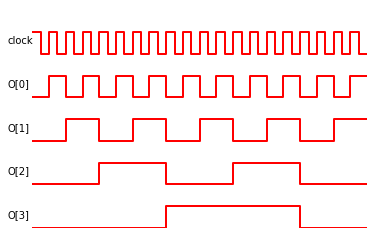

In [4]:
import matplotlib.pyplot as plt
import numpy as np

n = len(O1)//2
t = np.repeat(0.5*np.arange(2*n+1),2)[1:-1]
clock = np.tile(np.array([1,1,0,0]),n)

O0 = np.repeat(np.array(O0),2)
O1 = np.repeat(np.array(O1),2)
O2 = np.repeat(np.array(O2),2)
O3 = np.repeat(np.array(O3),2)

plt.text(-1.5, 4.25, 'clock')
plt.plot(t, 0.5*clock+4, 'r', linewidth = 2)
plt.text(-1.5, 3.25, 'O[0]')
plt.plot(t, 0.5*O0+3,    'r', linewidth = 2)
plt.text(-1.5, 2.25, 'O[1]')
plt.plot(t, 0.5*O1+2,    'r', linewidth = 2)
plt.text(-1.5, 1.25, 'O[2]')
plt.plot(t, 0.5*O2+1,    'r', linewidth = 2)
plt.text(-1.5, 0.25, 'O[3]')
plt.plot(t, 0.5*O3,    'r', linewidth = 2)
plt.xlim([0,n])
plt.ylim([0,5])

plt.gca().axis('off')
plt.show()